#### This report is aimed to provide insights on AdventureWorks customers.

In [1]:
import numpy as np
import pyodbc
import os
from IPython.core.display import display
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core import series

Connecting to SQL Server

In [2]:
load_dotenv('credentials.env')
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER='+os.environ.get('server')+';'
    'DATABASE='+os.environ.get('database')+';'
    'UID='+ os.environ.get('uid') +';'
    'PWD='+ os.environ.get('pwd')+';')

1. Overview of customers' gender.

,Customer Gender,Number Of People
0,Male,9351
1,Female,9133


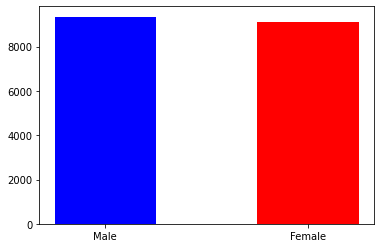

In [3]:
gender_overview = pd.read_sql("SELECT SUB.[Customer Gender], "
                              "COUNT(*) AS 'Number Of People' "
                              "FROM "
                              "(SELECT CASE "
                              "WHEN Gender = 'M' THEN 'Male' "
                              "WHEN Gender = 'F' THEN 'Female' "
                              "ELSE 'Not Specified' END AS 'Customer Gender' "
                              "FROM [AdventureWorks2019].[Sales].[vPersonDemographics]) sub "
                              "GROUP BY SUB.[Customer Gender] "
                              "ORDER BY 'Number Of People' DESC;", conn)

display(gender_overview)
df = gender_overview.set_index('Customer Gender')
ax = df.plot.bar(rot=0)
plt.show()


2. Overview the marital status of customers.

,Marital Status,Number Of People
0,Married,10011
1,Single,8473


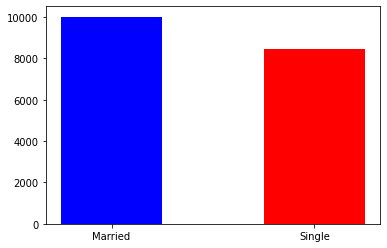

In [4]:
marital_status = pd.read_sql("SELECT "
                             "sub.[Marital Status], COUNT(*) AS 'Number Of People' "
                             "FROM (SELECT "
                             "CASE "
                             "WHEN MaritalStatus = 'M' THEN 'Married' "
                             "WHEN MaritalStatus = 'S' THEN 'Single' "
                             "ELSE 'Not Specified' END AS 'Marital Status' "
                             "FROM [AdventureWorks2019].[Sales].[vPersonDemographics]) sub GROUP BY sub.[Marital Status] "
                             "ORDER BY 'Number Of People' DESC;", conn)

display(marital_status)
df = marital_status.set_index('Marital Status')
df.plot(kind='bar', rot=0)
plt.show()

3. Examine the number of kids in a household.


,Total Children,Number Of Kids
0,No kids,5165
1,2 kids,3779
2,1 kid,3619
3,4 kids,2303
4,3 kids,2194
5,5 & more kids,1424


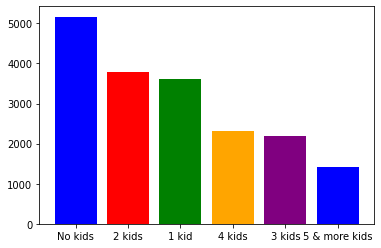

In [5]:
kids_in_household = pd.read_sql("SELECT "
                                "SUM(CASE WHEN TotalChildren = 0 THEN 1 ELSE NULL END) AS 'No kids', "
                                "SUM(CASE WHEN TotalChildren = 1 THEN 1 ELSE NULL END) AS '1 kid', "
                                "SUM(CASE WHEN TotalChildren = 2 THEN 1 ELSE NULL END) AS '2 kids', "
                                "SUM(CASE WHEN TotalChildren = 3 THEN 1 ELSE NULL END) AS '3 kids', "
                                "SUM(CASE WHEN TotalChildren = 4 THEN 1 ELSE NULL END) AS '4 kids', "
                                "SUM(CASE WHEN TotalChildren >= 5 THEN 1 ELSE NULL END) AS '5 and more kids', "
                                "SUM(CASE WHEN TotalChildren IS NULL THEN 1 ELSE NULL END) AS 'Not Specified' "
                                "FROM [AdventureWorks2019].[Sales].[vPersonDemographics];", conn)

display(kids_in_household)
# index = ['No kids', '1 kid', '2 kids', '3 kids', '4 kids', '5 and more kids']
# bar_chart = kids_in_household.plot.bar(rot=0)
df = kids_in_household
df.plot(kind='barh', rot=0)
plt.show()

4. Evaluate the yearly income among customers.

,YearlyIncome,Number Of People
0,25001-50000,5704
1,50001-75000,5476
2,0-25000,2922
3,75001-100000,2755
4,greater than 100000,1627


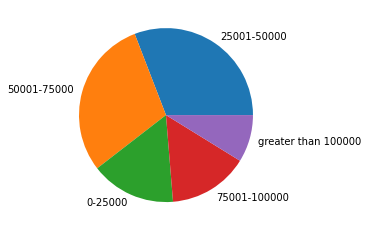

In [6]:
yearly_income = pd.read_sql("SELECT DISTINCT(YearlyIncome) AS 'Yearly Income', "
                            "COUNT(*) AS 'Total Count' "
                            "FROM [AdventureWorks2019].[Sales].[vPersonDemographics] "
                            "GROUP BY YearlyIncome "
                            "ORDER BY 2 DESC", conn)

display(yearly_income)
pie_chart = yearly_income.set_index('Yearly Income').plot(kind='pie', y='Total Count').legend(loc='center right', bbox_to_anchor=(2.0, 0.5))

5. Examine how many of AdventureWorks customers own a home.

,Home Ownership,Number Of People
0,Home Owner,12502
1,Not A Home Owner,5982


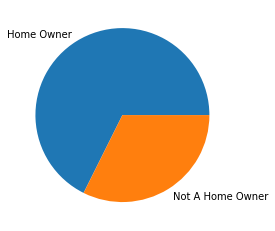

In [8]:
home_ownership = pd.read_sql("SELECT "
                            "SUM(CASE WHEN HomeOwnerFlag = 1 THEN 1 ELSE NULL END) AS 'Home Owner', "
                            "SUM(CASE WHEN HomeOwnerFlag = 0 THEN 1 ELSE NULL END) AS 'Not A Home Owner', "
                            "SUM(CASE WHEN HomeOwnerFlag IS NULL THEN 1 ELSE NULL END) AS 'Unknown' "
                            "FROM [AdventureWorks2019].[Sales].[vPersonDemographics];", conn)

display(home_ownership)
barh_chart = home_ownership.plot.barh()
